## 김가네 국민문화예술활동조사 전처리

### 해야할 작업
0. 열 선택(엑셀 활용)
1. 열 순서/이름 변경
    - target을 맨 앞으로
    - 2018년 데이터 합계 계산
2. 2018, 2020년 데이터 병합
3. 자료형 변경
4. NA 값 제거 또는 값 대체

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
import pandas as pd
import numpy as np

### 데이터 로드

In [ ]:
CS2018_raw = pd.read_csv('./data/국민문화예술활동조사2018.csv', encoding='euc-kr')
CS2020_raw = pd.read_csv('./data/국민문화예술활동조사2020.csv', encoding='euc-kr')

In [ ]:
CS2018_raw.head()
CS2020_raw.head()

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예",문3-7. 문화예술행사(직접관람)_선택기준,...,문12. 문화행사 참여시 가장 큰 어려움,문13. 1년 이내 문화공간에서 개최하는 문화행사 참여 의향,문23. 장애등록여부,[분석용] 시도,[분석용] 연령구분(70세이상),[분석용] 성별,[분석용] 혼인상태,[분석용] 가구소득,[분석용] 학력,[분석용] 종사상 지위
0,0,0,0,0,0,0,0,4,1,1,...,3,2,1,11,5,2,1,3,3,5
1,0,0,0,0,0,0,0,1,0,2,...,1,1,1,11,5,2,2,7,3,5
2,0,0,0,0,0,0,0,2,1,2,...,1,1,1,11,2,1,1,6,3,5
3,0,0,0,0,0,0,0,20,0,1,...,4,2,1,11,4,2,2,5,4,5
4,0,0,0,0,2,1,0,5,1,2,...,4,1,1,11,3,2,1,3,4,1


,문1-1.문화예술행사관람실태직접관람횟수_총합,문3-7.문화예술행사(직접관람)_선택기준,문3-8.문화예술행사(직접관람)_관람걸림돌,문4-1.매체를이용한문화예술행사관람횟수_총합,문7-1.문화예술관련많이지출하는항목_1순위,문7-2.문화예술관련향후지출을늘리고싶은항목_1순위,문13.문화행사참여시가장큰어려움,문14.1년이내문화공간에서개최하는문화행사참여의향,성별,연령,학력,동거가구원수,혼인상태,가구주여부,종사상지위,가구소득,시도,장애등록여부
0,0.0,2,2,120.0,28,17,2,1,1,7,1,2,3.0,1,1,4,3,1
1,2.0,9,8,20.0,28,28,7,1,2,7,1,2,2.0,2,3,2,12,1
2,0.0,2,2,NaN,28,17,3,2,2,4,3,2,3.0,1,5,1,6,1
3,2.0,2,1,60.0,1,1,1,1,2,4,3,3,2.0,2,5,6,3,1
4,3.0,1,6,42.0,17,17,6,1,2,3,4,3,2.0,2,5,5,1,1


In [ ]:
CS2018_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10558 entries, 0 to 10557
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)  10558 non-null  int64
 1   문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회    10558 non-null  int64
 2   문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)    10558 non-null  int64
 3   문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)          10558 non-null  int64
 4   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극                          10558 non-null  int64
 5   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬                         10558 non-null  int64
 6   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)        10558 non-null  int64
 7   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화                          10558 non-null  int64
 8   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예             

In [ ]:
CS2020_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   문1-1.문화예술행사관람실태직접관람횟수_총합     10098 non-null  float64
 1   문3-7.문화예술행사(직접관람)_선택기준       10099 non-null  int64  
 2   문3-8.문화예술행사(직접관람)_관람걸림돌      10099 non-null  int64  
 3   문4-1.매체를이용한문화예술행사관람횟수_총합     9081 non-null   float64
 4   문7-1.문화예술관련많이지출하는항목_1순위      10099 non-null  int64  
 5   문7-2.문화예술관련향후지출을늘리고싶은항목_1순위  10099 non-null  int64  
 6   문13.문화행사참여시가장큰어려움            10099 non-null  int64  
 7   문14.1년이내문화공간에서개최하는문화행사참여의향   10099 non-null  int64  
 8   성별                           10099 non-null  int64  
 9   연령                           10099 non-null  int64  
 10  학력                           10099 non-null  int64  
 11  동거가구원수                       10099 non-null  int64  
 12  혼인상태                         10067 non-null  float64
 13  가구주여부           

In [ ]:
# 문1-1.문화예술행사관람실태직접관람횟수_총합 에서 소수점 존재하는지 확인
import math

_l = []

for human in CS2020_raw['문1-1.문화예술행사관람실태직접관람횟수_총합']:
    _l.append(math.modf(human)[0] > 0)

sum(_l)

# 결측값 때문에 float으로 변환됨

0

### 2018년 데이터 정리

#### 열별 합계 구하기

In [ ]:
CS2018_raw.columns
# 문화예술행사 관람실태(직접관람) 횟수
# 매체를 이용한 문화예술행사 관람 횟수
# 위 column에 대해 각각 합계를 구해야 함

Index(['문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극', '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예',
       '문3-7. 문화예술행사(직접관람)_선택기준', '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극', '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화',
       '문4-1. 매체를 이용한 문화예술행사 관람

In [ ]:
CS2018 = CS2018_raw

In [ ]:
CS2018.iloc[:, 0:9].head(1)
CS2018.iloc[:, 11:20].head(1)

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예"
0,0,0,0,0,0,0,0,4,1


,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)",문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극,문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑨ 대중음악(가요콘서트), 연예"
0,0,0,0,0,0,0,0,4,40


In [ ]:
CS2018['문1-1.문화예술행사관람실태직접관람횟수_총합'] = CS2018.iloc[:, 0:9].apply(np.sum, axis=1)
CS2018['문4-1.매체를이용한문화예술행사관람횟수_총합'] = CS2018.iloc[:, 11:20].apply(np.sum, axis=1)

In [ ]:
CS2018.head()

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예",문3-7. 문화예술행사(직접관람)_선택기준,...,문23. 장애등록여부,[분석용] 시도,[분석용] 연령구분(70세이상),[분석용] 성별,[분석용] 혼인상태,[분석용] 가구소득,[분석용] 학력,[분석용] 종사상 지위,문1-1.문화예술행사관람실태직접관람횟수_총합,문4-1.매체를이용한문화예술행사관람횟수_총합
0,0,0,0,0,0,0,0,4,1,1,...,1,11,5,2,1,3,3,5,5,44
1,0,0,0,0,0,0,0,1,0,2,...,1,11,5,2,2,7,3,5,1,2
2,0,0,0,0,0,0,0,2,1,2,...,1,11,2,1,1,6,3,5,3,3
3,0,0,0,0,0,0,0,20,0,1,...,1,11,4,2,2,5,4,5,20,2
4,0,0,0,0,2,1,0,5,1,2,...,1,11,3,2,1,3,4,1,9,7


#### 2018년 데이터 열 선택, 순서, 이름 변경

In [ ]:
CS2018.columns

Index(['문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극', '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예',
       '문3-7. 문화예술행사(직접관람)_선택기준', '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극', '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화',
       '문4-1. 매체를 이용한 문화예술행사 관람

In [ ]:
CS2018 = CS2018[[
    '문1-1.문화예술행사관람실태직접관람횟수_총합',
    '문4-1.매체를이용한문화예술행사관람횟수_총합',
    '문3-7. 문화예술행사(직접관람)_선택기준',
    '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
    '문6-1. 문화예술 관련 많이 지출하는 항목_1순위',
    '문6-2. 문화예술 관련 향후 지출을 늘리고 싶은 항목1순위',
    '문12. 문화행사 참여시 가장 큰 어려움',
    '문13. 1년 이내 문화공간에서 개최하는 문화행사 참여 의향',
    '[분석용] 성별',
    '[분석용] 연령구분(70세이상)',
    '[분석용] 학력',
    '[분석용] 혼인상태',
    '[분석용] 종사상 지위',
    '[분석용] 가구소득',
    '[분석용] 시도',
    '문23. 장애등록여부',
]]

In [ ]:
CS2018.columns = [
    'dv_cnt',
    'mv_cnt',
    'standard',
    'block',
    'expense',
    'expense_f',
    'difficulty',
    'intention',
    'sex',
    'age',
    'education',
    'married',
    'work',
    'income',
    'sido',
    'disabled',
]

In [ ]:
CS2018.columns

Index(['dv_cnt', 'mv_cnt', 'standard', 'block', 'expense', 'expense_f',
       'difficulty', 'intention', 'sex', 'age', 'education', 'married', 'work',
       'income', 'sido', 'disabled'],
      dtype='object')

In [ ]:
CS2018.shape

(10558, 16)

In [ ]:
CS2018.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled
0,5,44,1,1,13,13,3,2,2,5,3,1,5,3,11,1


####

### 2020년 데이터 정리

In [ ]:
CS2020 = CS2020_raw

In [ ]:
CS2020.columns

Index(['문1-1.문화예술행사관람실태직접관람횟수_총합', '문3-7.문화예술행사(직접관람)_선택기준',
       '문3-8.문화예술행사(직접관람)_관람걸림돌', '문4-1.매체를이용한문화예술행사관람횟수_총합',
       '문7-1.문화예술관련많이지출하는항목_1순위', '문7-2.문화예술관련향후지출을늘리고싶은항목_1순위',
       '문13.문화행사참여시가장큰어려움', '문14.1년이내문화공간에서개최하는문화행사참여의향', '성별', '연령', '학력',
       '동거가구원수', '혼인상태', '가구주여부', '종사상지위', '가구소득', '시도', '장애등록여부'],
      dtype='object')

In [ ]:
CS2020 = CS2020[[
    '문1-1.문화예술행사관람실태직접관람횟수_총합',
    '문4-1.매체를이용한문화예술행사관람횟수_총합',
    '문3-7.문화예술행사(직접관람)_선택기준',
    '문3-8.문화예술행사(직접관람)_관람걸림돌',
    '문7-1.문화예술관련많이지출하는항목_1순위',
    '문7-2.문화예술관련향후지출을늘리고싶은항목_1순위',
    '문13.문화행사참여시가장큰어려움',
    '문14.1년이내문화공간에서개최하는문화행사참여의향',
    '성별',
    '연령',
    '학력',
    '혼인상태',
    '종사상지위',
    '가구소득',
    '시도',
    '장애등록여부',
]]

In [ ]:
CS2020.columns = [
    'dv_cnt',
    'mv_cnt',
    'standard',
    'block',
    'expense',
    'expense_f',
    'difficulty',
    'intention',
    'sex',
    'age',
    'education',
    'married',
    'work',
    'income',
    'sido',
    'disabled',
]

In [ ]:
CS2020.columns

Index(['dv_cnt', 'mv_cnt', 'standard', 'block', 'expense', 'expense_f',
       'difficulty', 'intention', 'sex', 'age', 'education', 'married', 'work',
       'income', 'sido', 'disabled'],
      dtype='object')

In [ ]:
CS2020.shape

(10099, 16)

In [ ]:
CS2020.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled
0,0.0,120.0,2,2,28,17,2,1,1,7,1,3.0,1,4,3,1


### '역사문화유적지방문경험여부' 열 추가

In [ ]:
CS2018_raw_raw = pd.read_csv('./raw_data/ML_국민문화예술활동조사/국민문화예술활동조사2018.csv', encoding='euc-kr')
CS2020_raw_raw = pd.read_csv('./raw_data/ML_국민문화예술활동조사/국민문화예술활동조사2020.csv', encoding='euc-kr')

In [ ]:
old_column_names_2018 = [
    '문16. 역사문화유적지 방문 경험 여부',
    '문17. 1년 이내 역사문화유적지 방문 의향',
    '문18. 축제(거리축제 포함) 방문 경험 여부',
    '문19. 1년 이내 축제 참여 의향',
]

old_column_names_2020 = [
    '문18.역사문화유적지방문경험여부',
    '문19.1년이내역사문화유적지방문의향',
    '문20.축제(거리축제포함)방문경험여부',
    '문21.1년이내축제참여의향',
]

new_column_names = [
    'history',
    'history_f',
    'festival',
    'festival_f'
]

#### 2018년 df에 추가

In [ ]:
CS2018 = pd.concat([CS2018, CS2018_raw_raw[old_column_names_2018]], axis=1)

In [ ]:
CS2018.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled,문16. 역사문화유적지 방문 경험 여부,문17. 1년 이내 역사문화유적지 방문 의향,문18. 축제(거리축제 포함) 방문 경험 여부,문19. 1년 이내 축제 참여 의향
0,5,44,1,1,13,13,3,2,2,5,3,1,5,3,11,1,1,6,2,6


#### 2020년 df에 추가

In [ ]:
CS2020 = pd.concat([CS2020, CS2020_raw_raw[old_column_names_2020]], axis=1)

In [ ]:
CS2020.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled,문18.역사문화유적지방문경험여부,문19.1년이내역사문화유적지방문의향,문20.축제(거리축제포함)방문경험여부,문21.1년이내축제참여의향
0,0.0,120.0,2,2,28,17,2,1,1,7,1,3.0,1,4,3,1,1,6,2,5


#### 18, 20년 df 열 이름 변경

In [ ]:
for old_column_name_2018, old_column_name_2020, new_column_name in zip(old_column_names_2018, old_column_names_2020, new_column_names):
    CS2018.rename(columns = {old_column_name_2018 : new_column_name}, inplace = True)
    CS2020.rename(columns = {old_column_name_2020 : new_column_name}, inplace = True)

In [ ]:
CS2018.head(1)
CS2020.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled,history,history_f,festival,festival_f
0,5,44,1,1,13,13,3,2,2,5,3,1,5,3,11,1,1,6,2,6


,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled,history,history_f,festival,festival_f
0,0.0,120.0,2,2,28,17,2,1,1,7,1,3.0,1,4,3,1,1,6,2,5


### 각 열에 대한 분석용 데이터 분리

In [ ]:
CS_preprocessing = pd.concat([CS2018, CS2020], axis=0, ignore_index=True)[[
    'sex',
    'age',
    'dv_cnt',
    'standard',
    'mv_cnt',
    'difficulty',
    'history',
    'festival',
]]

In [ ]:
CS_preprocessing.head(1)

,sex,age,dv_cnt,standard,mv_cnt,difficulty,history,festival
0,2,5,5.0,1,44.0,3,1,2


### 각 열에 대한 분석

In [ ]:
CS_preprocessing.info()

# dv_cnt, mv_cnt
#   횟수의 총합이므로 int형이어야 하는데
#   float 형태로 나타남
#   이는 NA 값 때문인 것으로 보임
#   NA 값에 해당하는 행은 삭제 필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         20657 non-null  int64  
 1   age         20657 non-null  int64  
 2   dv_cnt      20656 non-null  float64
 3   standard    20657 non-null  int64  
 4   mv_cnt      19639 non-null  float64
 5   difficulty  20657 non-null  int64  
 6   history     20657 non-null  int64  
 7   festival    20657 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


In [ ]:
# dv_cnt, mv_cnt 열 NA 값 제거
CS_preprocessing = CS_preprocessing.dropna(subset=['dv_cnt', 'mv_cnt'], axis=0)

In [ ]:
# dv_cnt, mv_cnt 열 int형으로 변경
CS_preprocessing = CS_preprocessing.astype({'dv_cnt':'int64', 'mv_cnt':'int64'})

In [ ]:
CS_preprocessing.info()
CS_preprocessing.isna().sum()
# 모두 int형으로 변환되었고, 결측값 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19638 entries, 0 to 20656
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         19638 non-null  int64
 1   age         19638 non-null  int64
 2   dv_cnt      19638 non-null  int64
 3   standard    19638 non-null  int64
 4   mv_cnt      19638 non-null  int64
 5   difficulty  19638 non-null  int64
 6   history     19638 non-null  int64
 7   festival    19638 non-null  int64
dtypes: int64(8)
memory usage: 1.3 MB


sex           0
age           0
dv_cnt        0
standard      0
mv_cnt        0
difficulty    0
history       0
festival      0
dtype: int64

[Text(0.5, 1.0, 'sex')]

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'standard')]

[Text(0.5, 1.0, 'difficulty')]

[Text(0.5, 1.0, 'history')]

[Text(0.5, 1.0, 'festival')]

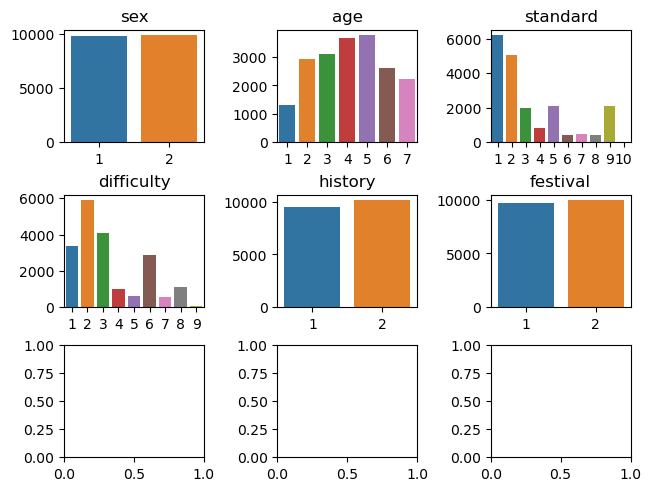

In [ ]:
# 범주형 변수에 대한 히스토그램
# sex, age, standard, difficulty, history, festival

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

hist_column_names = ['sex', 'age', 'standard', 'difficulty', 'history', 'festival']
_r = 3
_c = 3
fig, axis = plt.subplots(_r, _c, constrained_layout=True)

for i, column in enumerate(hist_column_names):
    sns.barplot(
        x=CS_preprocessing[column].value_counts().index,
        y=CS_preprocessing[column].value_counts().values,
        ax=axis[i//_c, i%_c],
    ).set(title=column)

plt.show()

<Axes: >

<Axes: xlabel='dv_cnt', ylabel='Count'>

<Axes: >

<Axes: xlabel='mv_cnt', ylabel='Count'>

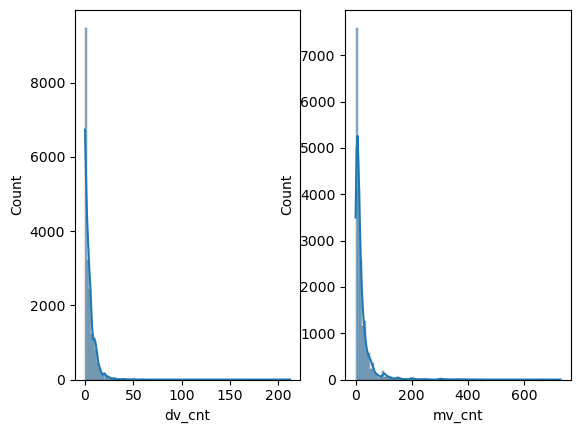

In [ ]:
# 연속형 변수에 대한 히스토그램
plt.subplot(121)
sns.histplot(x=CS_preprocessing['dv_cnt'],
             bins=100,
             kde=True,
            )

plt.subplot(122)
sns.histplot(x=CS_preprocessing['mv_cnt'],
             bins=100,
             kde=True,
            )
plt.show()

# 매우 큰 값 때문에 제대로 안 나옴

<Axes: >

<Axes: xlabel='dv_cnt', ylabel='Count'>

<Axes: >

<Axes: xlabel='mv_cnt', ylabel='Count'>

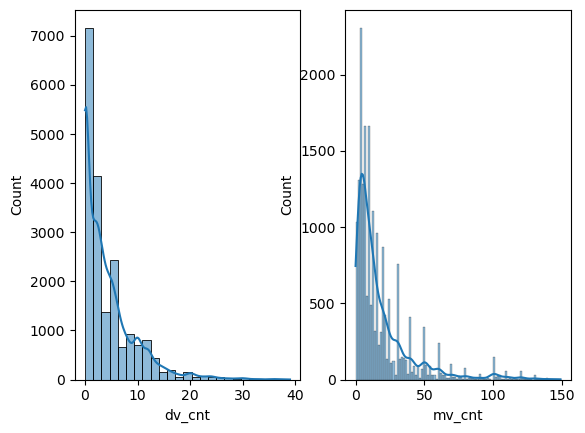

In [ ]:
# dv_cnt >= 40, mv_cnt >= 150 인 경우 제외하고 히스토그램 그리기
plt.subplot(121)
sns.histplot(x=CS_preprocessing['dv_cnt'][CS_preprocessing['dv_cnt'] < 40],
             bins=25,
             kde=True,
            )

plt.subplot(122)
sns.histplot(x=CS_preprocessing['mv_cnt'][CS_preprocessing['mv_cnt'] < 150],
             bins=100,
             kde=True,
            )
plt.show()

<Axes: >

<Axes: xlabel='dv_cnt', ylabel='Count'>

<Axes: >

<Axes: xlabel='mv_cnt', ylabel='Count'>

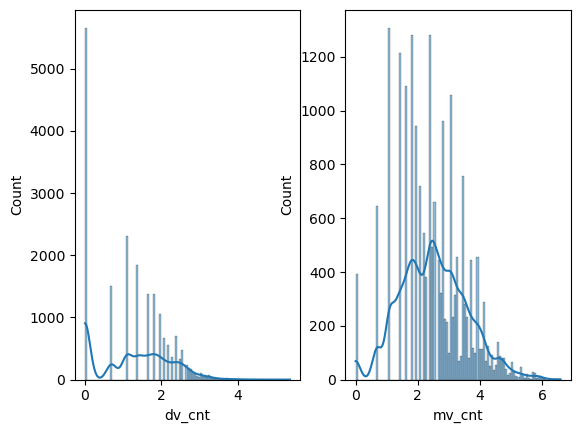

In [ ]:
# dv_cnt, mv_cnt 에 log1p 씌우고 히스토그램 그리기
plt.subplot(121)
sns.histplot(x=np.log1p(CS_preprocessing['dv_cnt']),
             bins=100,
             kde=True,
            )

plt.subplot(122)
sns.histplot(x=np.log1p(CS_preprocessing['mv_cnt']),
             bins=100,
             kde=True,
            )
plt.show()

### RAW  데이터의 연속형 변수 결측값 재확인
---
- 2020년 데이터의 연속형 데이터에 대해 NA 값을 0으로 채워야 함으로 보임.
---
- 반면, 2018년의 연속형 데이터(합계 데이터)는 NA가 아닌 0으로 채워져 있지만,
- 각 범주별 합계 열이 없고, 따로 나타나 있음
- 이를 범주별로 합쳐주는 작업 필요
---
- 이후 두 데이터 병합

In [ ]:
# 열 추가 전 shape 확인

CS2018.shape
CS2020.shape

(10558, 20)

(10099, 20)

In [ ]:
# 추가할 열 이름(임시)
column_names_add = [
    'where_cnt',
    'attend_cnt',
    'volunteer_cnt',
    'history_cnt',
    'festival_cnt',
]

#### 2018년 연속형 데이터 중 각 범주별 합계를 구해야 하는 열들의 합계 도출

In [ ]:
# 2020년 데이터에 있는 연속형 데이터 중
# 2018년 데이터에 합계가 아닌
# 각 범주별 참여 횟수로 이루어진 데이터들의 앞 글자
# 이미 CS에 존재하는 열은 주석 처리

continuous_keywords_2018 = [
    #'문1-1. 문화예술행사 관람실태',
    #'문4-1. 매체를 이용한 문화예술행사',
    '문11-1. 문화예술활동 공간이용 횟수',
    '문11-4. 문화예술활동 문화 행사 참석 횟수_',
]

In [ ]:
# 2018년 연속형 데이터 중
# 각 범주별 합계를 구해야 하는 열들
# continuous_column_names_2018
continuous_column_names_2018 = []

for keyword in continuous_keywords_2018:
    keyword_columns = []

    for column in CS2018_raw_raw.columns:
        keyword_columns.append(keyword in column)

    continuous_column_names_2018.extend(CS2018_raw_raw.columns[keyword_columns])

In [ ]:
continuous_column_names_2018[:14]
continuous_column_names_2018[14:]

['문11-1. 문화예술활동 공간이용 횟수_① 시,군,구민 회관',
 '문11-1. 문화예술활동 공간이용 횟수_② 문예회관',
 '문11-1. 문화예술활동 공간이용 횟수_③ 복지회관(노인복지회관 등)',
 '문11-1. 문화예술활동 공간이용 횟수_④ 청소년회관(수련원, 수련관 등)',
 '문11-1. 문화예술활동 공간이용 횟수_⑤ 문화원',
 '문11-1. 문화예술활동 공간이용 횟수_⑥ 도서관(학교도서관 제외)',
 '문11-1. 문화예술활동 공간이용 횟수_⑦ 박물관(미술관 포함)',
 '문11-1. 문화예술활동 공간이용 횟수_⑧ 문학관',
 '문11-1. 문화예술활동 공간이용 횟수_⑨ 생활문화센터',
 '문11-1. 문화예술활동 공간이용 횟수_⑩ 문화의 집',
 '문11-1. 문화예술활동 공간이용 횟수_⑪ 대학교 부설 사회문화 교실',
 '문11-1. 문화예술활동 공간이용 횟수_⑫ 사설문화센터(백화점, 신문사, 방송사 등)',
 '문11-1. 문화예술활동 공간이용 횟수_⑬ 주민자치센터',
 '문11-1. 문화예술활동 공간이용 횟수_⑭ 민간공영장(공공에 포함되지 않은 공영장)']

['문11-4. 문화예술활동 문화 행사 참석 횟수_① 시,군,구민 회관',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_② 문예회관',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_③ 복지회관(노인복지회관 등)',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_④ 청소년회관(수련원, 수련관 등)',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑤ 문화원',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑥ 도서관(학교도서관 제외)',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑦ 박물관(미술관 포함)',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑧ 문학관',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑨ 생활문화센터',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑩ 문화의 집',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑪ 대학교 부설 사회문화 교실',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑫ 사설문화센터(백화점, 신문사, 방송사 등)',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑬ 주민자치센터',
 '문11-4. 문화예술활동 문화 행사 참석 횟수_⑭ 민간공영장(공공에 포함되지 않은 공영장)']

In [ ]:
# 각 범주별 합계 CS2018에 삽입

CS2018[column_names_add[0]] = CS2018_raw_raw[continuous_column_names_2018[:14]].apply(np.sum, axis=1).astype(int)
CS2018[column_names_add[1]] = CS2018_raw_raw[continuous_column_names_2018[14:]].apply(np.sum, axis=1).astype(int)

In [ ]:
# 연속형 데이터의 na값 처리

CS2018[column_names_add[2:]] = CS2018_raw_raw[[
    '문14-1. 문화관련 자원봉사 활동 참여 횟수',
    '문16-A. 역사문화유적지 방문 경험 횟수',
    '문18-A. 축제(거리축제 포함) 방문 경험 횟수',
]].fillna(0).astype({
    '문14-1. 문화관련 자원봉사 활동 참여 횟수':'int64',
    '문16-A. 역사문화유적지 방문 경험 횟수':'int64',
    '문18-A. 축제(거리축제 포함) 방문 경험 횟수':'int64',
})

In [ ]:
CS2018.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,...,disabled,history,history_f,festival,festival_f,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt
0,5,44,1,1,13,13,3,2,2,5,...,1,1,6,2,6,0,0,0,5,0


#### 2020년 연속형 데이터 na값 0으로 대체

In [ ]:
# 2020년 raw 데이터의 연속형 변수 이름

continuous_column_names_2020 = [
    #'문1-1.문화예술행사관람실태직접관람횟수_총합',
    #'문4-1.매체를이용한문화예술행사관람횟수_총합',
    '문12-1.문화예술활동공간이용횟수_총합',
    '문12-4.문화예술활동문화행사참석횟수_총합',
    '문15-1.문화관련자원봉사활동참여횟수',
    '문18-A.역사문화유적지방문경험횟수',
    '문20-A.축제(거리축제포함)방문경험횟수',
]

In [ ]:
CS2020_raw_raw[continuous_column_names_2020].isna().sum()

문12-1.문화예술활동공간이용횟수_총합      5173
문12-4.문화예술활동문화행사참석횟수_총합    5173
문15-1.문화관련자원봉사활동참여횟수       9813
문18-A.역사문화유적지방문경험횟수        6326
문20-A.축제(거리축제포함)방문경험횟수     6730
dtype: int64

In [ ]:
for column_name, continuous_column_name in zip(column_names_add, continuous_column_names_2020):
    CS2020[column_name] = CS2020_raw_raw[continuous_column_name].fillna(0).astype({continuous_column_name : 'int64'})

In [ ]:
CS2020.head(1)
CS2020.shape

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,...,disabled,history,history_f,festival,festival_f,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt
0,0.0,120.0,2,2,28,17,2,1,1,7,...,1,1,6,2,5,2,0,0,1,0


(10099, 25)

### 연속형 변수 데이터 분포 확인
- 임시

In [ ]:
CS2018['temp_sum'] = CS2018[column_names_add].sum(axis=1)

<Axes: >

<Axes: ylabel='Count'>

<Axes: >

<Axes: ylabel='Count'>

<Axes: >

<Axes: xlabel='dv_cnt', ylabel='Count'>

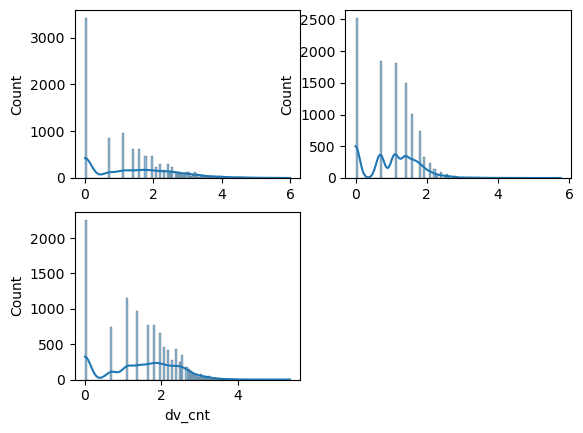

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.subplot(221)
sns.histplot(x=np.log1p(CS2018[column_names_add[:2]].sum(axis=1)),
             bins=100,
             kde=True,
            )

plt.subplot(222)
sns.histplot(x=np.log1p(CS2018[column_names_add[2:]].sum(axis=1)),
             bins=100,
             kde=True,
            )

plt.subplot(223)
sns.histplot(x=np.log1p(CS2018['dv_cnt']),
             bins=100,
             kde=True,
            )

plt.show()



<Axes: >

<Axes: xlabel='festival_cnt', ylabel='Count'>

<Axes: >

<Axes: xlabel='festival_cnt', ylabel='Count'>

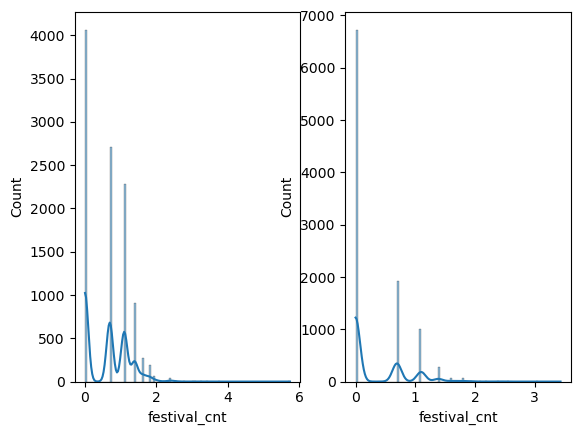

In [ ]:
plt.subplot(121)
sns.histplot(x=np.log1p(CS2018[column_names_add[4]]),
             bins=100,
             kde=True,
            )

plt.subplot(122)
sns.histplot(x=np.log1p(CS2020[column_names_add[4]]),
             bins=100,
             kde=True,
            )

plt.show()

### 범주형 데이터의 코드값 통일

In [ ]:
# 코드 통일이 필요한 열 이름
need_setting_columns = [
    'sido',
    'expense',
    'expense_f',
]

In [ ]:
# 코드값 통일이 필요한 열들의
# 통일 전 카테고리 출력
print('2018년')
for column in need_setting_columns:
    CS2018[column].value_counts().sort_index()

print('2020년')
for column in need_setting_columns:
    CS2020[column].value_counts().sort_index()

2018년


11    1227
21     759
22     636
23     646
24     480
25     490
26     421
29     191
31    1333
32     482
33     501
34     586
35     561
36     543
37     671
38     730
39     301
Name: sido, dtype: int64

1      231
2       35
3       51
4       14
5       42
6      502
7       27
8       40
9      212
10     148
11      53
12     192
13    5752
14     364
15      16
16     414
17      12
18      20
19      18
20       3
21    2412
Name: expense, dtype: int64

1      391
2       93
3       60
4       48
5       96
6      424
7      125
8       90
9      276
10     488
11     212
12     533
13    4689
14     906
15      43
16    1183
17      41
18      51
19      79
21     730
Name: expense_f, dtype: int64

2020년


1     1928
2      686
3      491
4      549
5      293
6      303
7      222
8       62
9     2412
10     314
11     329
12     436
13     376
14     361
15     549
16     667
17     121
Name: sido, dtype: int64

1      440
2       38
3       31
4       23
5       31
6       27
7        9
8     1026
9      351
10      18
11      73
12      34
13      56
14      95
15     185
16      20
17    4334
18     334
19       5
20      26
21      21
22      13
23       3
25       7
26      28
27      33
28    2838
Name: expense, dtype: int64

1      392
2       69
3       29
4       39
5       52
6       76
7       16
8      607
9      297
10      99
11     161
12      85
13     209
14     271
15     645
16      35
17    4668
18     985
19      17
20      53
21      47
22      32
23      12
24      15
25      10
26      38
27      64
28    1076
Name: expense_f, dtype: int64

In [ ]:
# '코드값 변경 이전 : 이후 딕셔너리'를 포함한 리스트 2018년
setting_codes_2018 = [
    # sido
    {
        11 : 1,
        21 : 2,
        22 : 3,
        23 : 4,
        24 : 5,
        25 : 6,
        26 : 7,
        29 : 8,
        31 : 9,
        32 : 10,
        33 : 11,
        34 : 12,
        35 : 13,
        36 : 14,
        37 : 15,
        38 : 16,
        39 : 17,
    },
    # expense
    {
        # 구입대여
        1 : 1,
        2 : 1,
        3 : 2,
        4 : 3,
        5 : 4,
        6 : 7,
        7 : 5,
        8 : 6,
        9 : 8,
        # 관람
        10 : 9,
        11 : 10,
        12 : 11,
        13 : 14,
        14 : 12,
        15 : 13,
        16 : 15,
        # 기타 코드값 20번으로 통일
        17 : 16,
        18 : 16,
        19 : 16,
        20 : 16,
        # 해당사항 없음
        21 : 17,
    },
    # expense_f
    {
        # 구입대여
        1 : 1,
        2 : 1,
        3 : 2,
        4 : 3,
        5 : 4,
        6 : 7,
        7 : 5,
        8 : 6,
        9 : 8,
        # 관람
        10 : 9,
        11 : 10,
        12 : 11,
        13 : 14,
        14 : 12,
        15 : 13,
        16 : 15,
        # 기타 코드값 20번으로 통일
        17 : 16,
        18 : 16,
        19 : 16,
        20 : 16,
        # 해당사항 없음
        21 : 17,
    },
]

In [ ]:
# '코드값 변경 이전 : 이후 딕셔너리'를 포함한 리스트 2020년
setting_codes_2020 = [
    # sido
    {
        # 변경 사항 없음
    },
    # expense
    {
        # 구입대여
        1 : 1,
        2 : 2,
        3 : 3,
        4 : 4,
        5 : 5,
        6 : 5,
        7 : 6,
        8 : 7,
        9 : 8,
        # 관람
        10 : 9,
        11 : 9,
        12 : 10,
        13 : 11,
        14 : 12,
        15 : 12,
        16 : 13,
        17 : 14,
        18 : 15,
        # 기타 코드값 20번으로 통일
        19 : 16,
        20 : 16,
        21 : 16,
        22 : 16,
        23 : 16,
        24 : 16,
        25 : 16,
        26 : 16,
        27 : 16,
        # 해당사항 없음, 모름/무응답
        28 : 17,
        99 : 17,
    },
    # expense_f
    {
        # 구입대여
        1 : 1,
        2 : 2,
        3 : 3,
        4 : 4,
        5 : 5,
        6 : 5,
        7 : 6,
        8 : 7,
        9 : 8,
        # 관람
        10 : 9,
        11 : 9,
        12 : 10,
        13 : 11,
        14 : 12,
        15 : 12,
        16 : 13,
        17 : 14,
        18 : 15,
        # 기타 코드값 20번으로 통일
        19 : 16,
        20 : 16,
        21 : 16,
        22 : 16,
        23 : 16,
        24 : 16,
        25 : 16,
        26 : 16,
        27 : 16,
        # 해당사항 없음, 모름/무응답
        28 : 17,
        99 : 17,
    },
]

In [ ]:
# 통일되기 이전 : 이후 <= 딕셔너리
# setting_prev_next = {
#     '11' : '1',
#     ...
# }

# # 변수 선언
# df = CS2018
# column_name = 'sido'

# # 코드 통일
# setting_done_list = []

# for code in df[column_name]:
#     setting_done_list.append(setting_prev_next[code])

# df[column_name] = setting_done_list

In [ ]:
# 코드 통일 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []

    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])

    return setting_done_list

In [ ]:
# 코드 통일이 필요한 모든 열에 대해 코드 통일
for i, column in enumerate(need_setting_columns):
    print(i)
    CS2018[column] = get_list_setting_column(CS2018[column], setting_codes_2018[i])
    print(i)
    if i != 0:
        CS2020[column] = get_list_setting_column(CS2020[column], setting_codes_2020[i])

0
0
1
1
2
2


In [ ]:
# 코드값 통일이 필요한 열들의
# 통일 후 카테고리 출력
print('2018년')
for column in need_setting_columns:
    CS2018[column].value_counts().sort_index()

print('2020년')
for column in need_setting_columns:
    CS2020[column].value_counts().sort_index()

2018년


1     1227
2      759
3      636
4      646
5      480
6      490
7      421
8      191
9     1333
10     482
11     501
12     586
13     561
14     543
15     671
16     730
17     301
Name: sido, dtype: int64

1      266
2       51
3       14
4       42
5       27
6       40
7      502
8      212
9      148
10      53
11     192
12     364
13      16
14    5752
15     414
16      53
17    2412
Name: expense, dtype: int64

1      484
2       60
3       48
4       96
5      125
6       90
7      424
8      276
9      488
10     212
11     533
12     906
13      43
14    4689
15    1183
16     171
17     730
Name: expense_f, dtype: int64

2020년


1     1928
2      686
3      491
4      549
5      293
6      303
7      222
8       62
9     2412
10     314
11     329
12     436
13     376
14     361
15     549
16     667
17     121
Name: sido, dtype: int64

1      440
2       38
3       31
4       23
5       58
6        9
7     1026
8      351
9       91
10      34
11      56
12     280
13      20
14    4334
15     334
16     136
17    2838
Name: expense, dtype: int64

1      392
2       69
3       29
4       39
5      128
6       16
7      607
8      297
9      260
10      85
11     209
12     916
13      35
14    4668
15     985
16     288
17    1076
Name: expense_f, dtype: int64



```
# 코드로 형식 지정됨
```

### NA값 처리

In [ ]:
CS2018.isna().sum()

dv_cnt           0
mv_cnt           0
standard         0
block            0
expense          0
expense_f        0
difficulty       0
intention        0
sex              0
age              0
education        0
married          0
work             0
income           0
sido             0
disabled         0
history          0
history_f        0
festival         0
festival_f       0
where_cnt        0
attend_cnt       0
volunteer_cnt    0
history_cnt      0
festival_cnt     0
temp_sum         0
dtype: int64

In [ ]:
CS2020.isna().sum()

dv_cnt              1
mv_cnt           1018
standard            0
block               0
expense             0
expense_f           0
difficulty          0
intention           0
sex                 0
age                 0
education           0
married            32
work                0
income              0
sido                0
disabled            0
history             0
history_f           0
festival            0
festival_f          0
where_cnt           0
attend_cnt          0
volunteer_cnt       0
history_cnt         0
festival_cnt        0
dtype: int64

1. dv_cnt
    - 결측값 제거
2. mv_cnt
    - 결측값 0으로 치환
3. married
    - 결측값 제거

In [ ]:
CS2020 = CS2020[CS2020['dv_cnt'].notnull()]
CS2020['mv_cnt'].fillna(0, inplace=True)
CS2020 = CS2020[CS2020['married'].notnull()]

In [ ]:
CS2020.isna().sum()
# 2020년 데이터 결측치 처리 완료

dv_cnt           0
mv_cnt           0
standard         0
block            0
expense          0
expense_f        0
difficulty       0
intention        0
sex              0
age              0
education        0
married          0
work             0
income           0
sido             0
disabled         0
history          0
history_f        0
festival         0
festival_f       0
where_cnt        0
attend_cnt       0
volunteer_cnt    0
history_cnt      0
festival_cnt     0
dtype: int64

### 2018, 2020년 데이터 병합

In [ ]:
# shape 확인
CS2018.shape
CS2020.shape

(10558, 26)

(10066, 25)

In [ ]:
CS = pd.concat([CS2018, CS2020], axis=0, ignore_index=True)

In [ ]:
CS.info()
# float 자료형 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dv_cnt         20624 non-null  float64
 1   mv_cnt         20624 non-null  float64
 2   standard       20624 non-null  int64  
 3   block          20624 non-null  int64  
 4   expense        20624 non-null  int64  
 5   expense_f      20624 non-null  int64  
 6   difficulty     20624 non-null  int64  
 7   intention      20624 non-null  int64  
 8   sex            20624 non-null  int64  
 9   age            20624 non-null  int64  
 10  education      20624 non-null  int64  
 11  married        20624 non-null  float64
 12  work           20624 non-null  int64  
 13  income         20624 non-null  int64  
 14  sido           20624 non-null  int64  
 15  disabled       20624 non-null  int64  
 16  history        20624 non-null  int64  
 17  history_f      20624 non-null  int64  
 18  festiv

In [ ]:
# float -> int 변경
CS['dv_cnt'] = CS['dv_cnt'].astype(int)
CS['mv_cnt'] = CS['mv_cnt'].astype(int)
CS['married'] = CS['married'].astype(int)

### target 변수 병합
- dv_cnt + mv_cnt = view_cnt

In [ ]:
# 잔여 target 및 임시 변수 삭제
CS_final = CS.drop(['dv_cnt', 'mv_cnt', 'temp_sum'], axis=1)

In [ ]:
# view_cnt 생성
CS_final['view_cnt'] = CS['dv_cnt'] + CS['mv_cnt']

In [ ]:
CS_final.info()

# float 자료형 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   standard       20624 non-null  int64
 1   block          20624 non-null  int64
 2   expense        20624 non-null  int64
 3   expense_f      20624 non-null  int64
 4   difficulty     20624 non-null  int64
 5   intention      20624 non-null  int64
 6   sex            20624 non-null  int64
 7   age            20624 non-null  int64
 8   education      20624 non-null  int64
 9   married        20624 non-null  int32
 10  work           20624 non-null  int64
 11  income         20624 non-null  int64
 12  sido           20624 non-null  int64
 13  disabled       20624 non-null  int64
 14  history        20624 non-null  int64
 15  history_f      20624 non-null  int64
 16  festival       20624 non-null  int64
 17  festival_f     20624 non-null  int64
 18  where_cnt      20624 non-null  int64
 19  atte

In [ ]:
CS_final

,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,...,history,history_f,festival,festival_f,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,view_cnt
0,1,1,14,14,3,2,2,5,3,1,...,1,6,2,6,0,0,0,5,0,49
1,2,6,14,9,1,1,2,5,3,2,...,1,7,2,7,3,3,0,1,0,3
2,2,1,8,15,1,1,1,2,3,1,...,2,4,2,4,0,0,0,0,0,6
3,1,2,14,14,4,2,2,4,4,2,...,2,4,2,5,12,2,0,0,0,22
4,2,1,14,14,4,1,2,3,4,1,...,1,5,2,4,3,2,0,2,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,4,3,14,14,6,1,2,4,4,2,...,1,6,1,6,7,0,0,5,1,59
20620,1,2,14,14,2,1,2,3,4,2,...,1,6,1,6,6,0,0,2,1,49
20621,1,2,17,14,2,1,1,5,4,2,...,2,4,2,4,0,0,0,0,0,4
20622,1,2,14,14,2,1,2,4,4,2,...,2,6,1,6,5,0,0,0,2,58


In [ ]:
CS_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   standard       20624 non-null  int64
 1   block          20624 non-null  int64
 2   expense        20624 non-null  int64
 3   expense_f      20624 non-null  int64
 4   difficulty     20624 non-null  int64
 5   intention      20624 non-null  int64
 6   sex            20624 non-null  int64
 7   age            20624 non-null  int64
 8   education      20624 non-null  int64
 9   married        20624 non-null  int32
 10  work           20624 non-null  int64
 11  income         20624 non-null  int64
 12  sido           20624 non-null  int64
 13  disabled       20624 non-null  int64
 14  history        20624 non-null  int64
 15  history_f      20624 non-null  int64
 16  festival       20624 non-null  int64
 17  festival_f     20624 non-null  int64
 18  where_cnt      20624 non-null  int64
 19  atte

In [ ]:
CS_final = CS_final[[
    'view_cnt',
    'where_cnt',
    'attend_cnt',
    'volunteer_cnt',
    'history_cnt',
    'festival_cnt',
    'standard',
    'block',
    'expense',
    'expense_f',
    'difficulty',
    'intention',
    'history',
    'history_f',
    'festival',
    'festival_f',
    'sex',
    'age',
    'education',
    'married',
    'work',
    'income',
    'sido',
    'disabled',
]]

### 데이터 프레임 저장

In [ ]:
# CS2018.drop('temp_sum', axis=1).to_csv('./data/CS2018.csv', index = False)

In [ ]:
# CS2020.to_csv('./data/CS2020.csv', index = False)

In [ ]:
CS_final.to_csv('./data/CS.csv', index = False)